### Scroll to bottom for Kepler Zoo Plot

In [1]:
import pdb
from math import log10, floor

import numpy as np
import scipy.optimize as op
import scipy.special as spec
from scipy import stats
from scipy import io
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator, LogFormatter, ScalarFormatter

import seaborn as sns
import corner

import astropy
from astropy import stats as astrostats
from astropy.timeseries import LombScargle

import emcee
import radvel
from radvel.plot import orbit_plots, mcmc_plots

%matplotlib inline

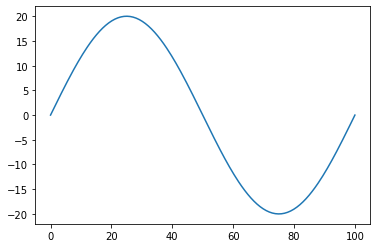

In [58]:
# Make the figure object.
fig, ax = plt.subplots()

# Choose the orbital elements. [period, tperiastron, eccentricity, omega, k]
orbel = [100, 25, 0, 0, 20]

# Choose times to sample. Just sample across the full period range.
times = np.linspace(0, orbel[0], 200)
rvmod = radvel.kepler.rv_drive(times, orbel)

# Here's the basic plotting functionality. Try playing with axis labels, ranges, etc.
ax.plot(times, rvmod)

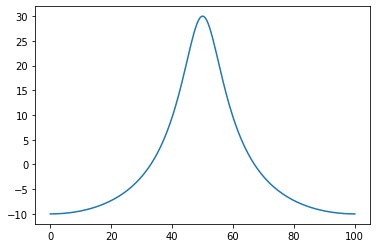

In [3]:
fig, ax = plt.subplots()

# Choose the orbital elements. [period, tperiastron, eccentricity, omega, k]
orbel = [100, 50, 0.5, 0, 20]

times = np.linspace(0, orbel[0], 200)
rvmod = radvel.kepler.rv_drive(times, orbel)

ax.plot(times, rvmod)

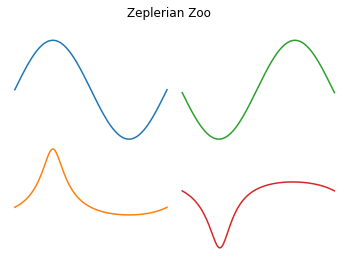

<Figure size 288x288 with 0 Axes>

In [69]:
orbel1 = [100, 25, 0, 0, 20]
orbel2 = [100, 25, 0, 3.2, 20]
orbel3 = [100, 25, 0.5, 0, 20]
orbel4 = [100, 25, 0.5, 3.2, 20]

times = np.linspace(0, orbel1[0], 200)
rvmod1 = radvel.kepler.rv_drive(times, orbel1)
rvmod2 = radvel.kepler.rv_drive(times, orbel2)
rvmod3 = radvel.kepler.rv_drive(times, orbel3)
rvmod4 = radvel.kepler.rv_drive(times, orbel4)

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
(ax1, ax2), (ax3, ax4) = axs
fig.suptitle('Zeplerian Zoo')
ax1.plot(times, rvmod1)
ax2.plot(times, rvmod2, 'tab:green')
ax3.plot(times, rvmod3, 'tab:orange')
ax4.plot(times, rvmod4, 'tab:red')

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')

for ax in axs.flat:
    ax.label_outer()
    
fig2 = plt.figure(figsize = (4,4))
ax5 = fig2.add_subplot

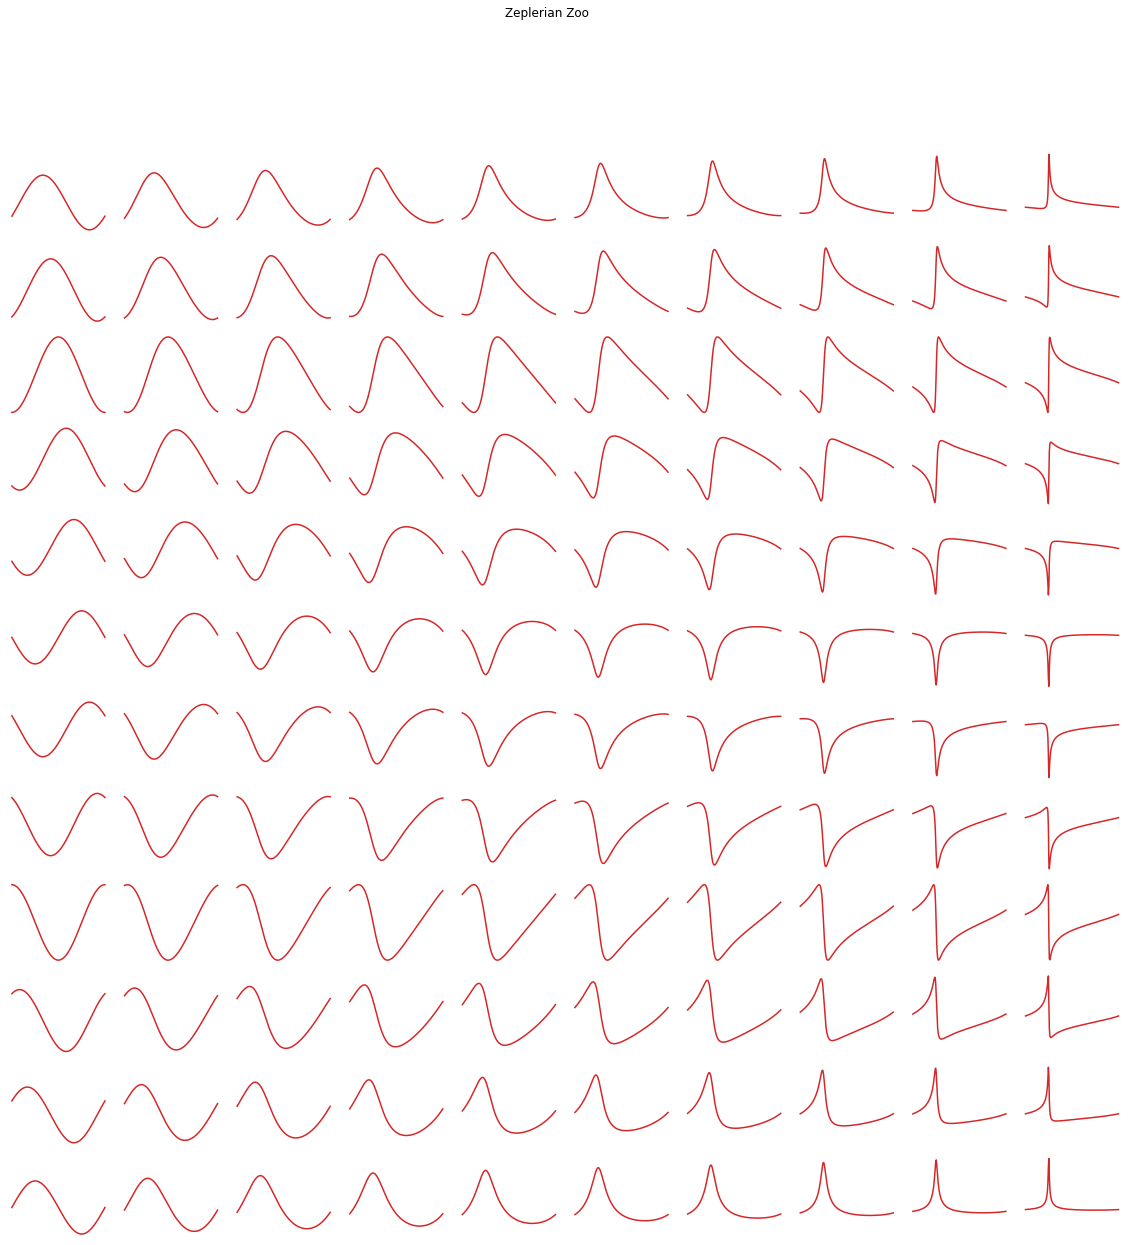

In [71]:
fig, axs = plt.subplots(12, 10, figsize = (20,20), sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
fig.suptitle('Zeplerian Zoo')
#ax0 = fig.add_axes([0, 1, 10, 10], ylim = (-30, 360), xlim = (-0.1, 1.0))

e_steps = np.linspace(0, 1.0, 11)
w_steps = np.linspace(0, 2*np.pi, 13)

orbels = []

# Creates a list of all orbital parameters for each plot, left to right, top to bottom
for i in range(12):
    for j in range(10):
        orbels.append([100, 25, e_steps[j], w_steps[i], 20])

times = np.linspace(0, 100, 200)
rvmods = []

# Creates a list of all RV models for plotting
for i in range(120):
    rvmods.append(radvel.kepler.rv_drive(times, orbels[i]))

j=0
    
for i in range(12):
    for ax in axs[11-i]:
        ax.plot(times,rvmods[j],'tab:red')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.axis('off')
        j = j + 1
        
fig.savefig('Kepler_Zoo.png', bbox_inches='tight')

### Flashcard images:

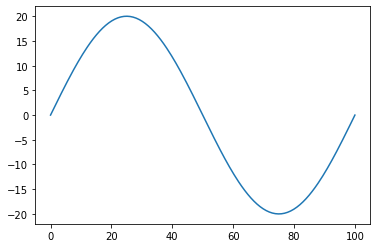

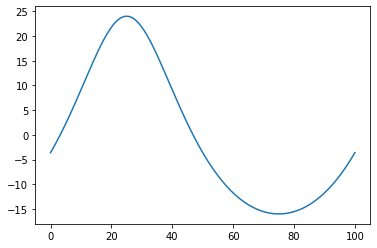

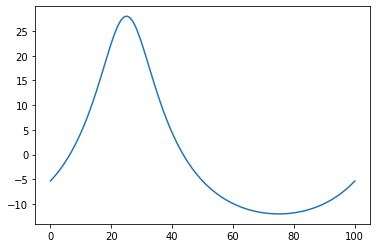

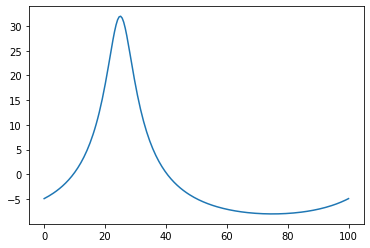

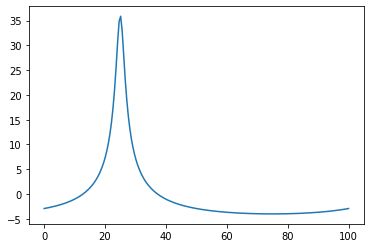

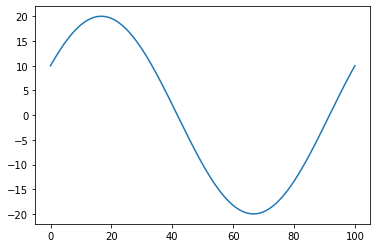

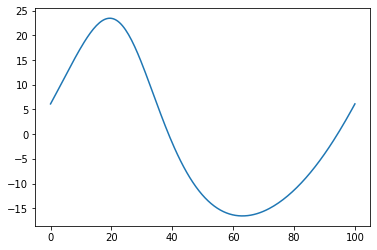

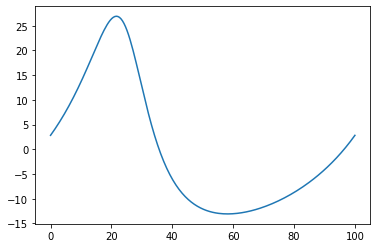

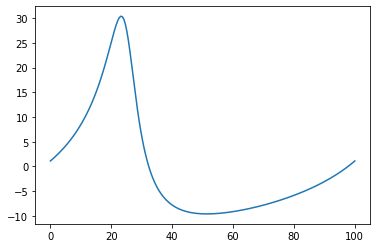

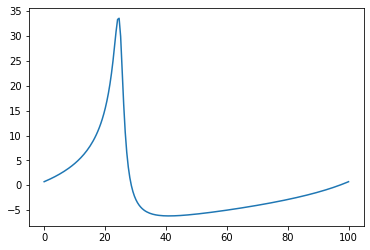

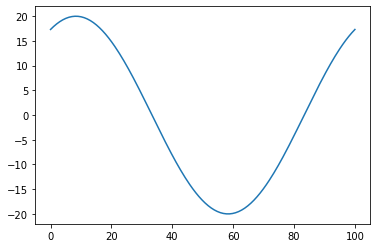

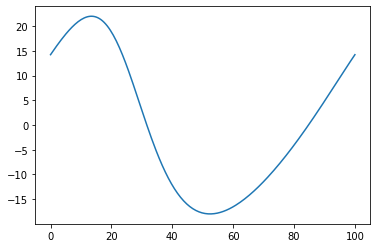

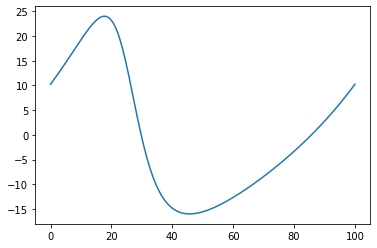

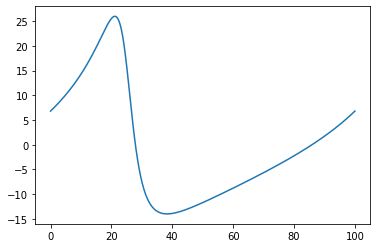

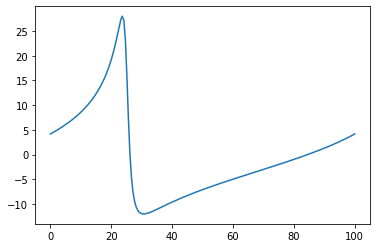

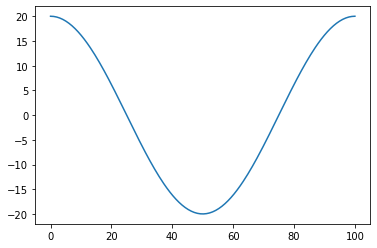

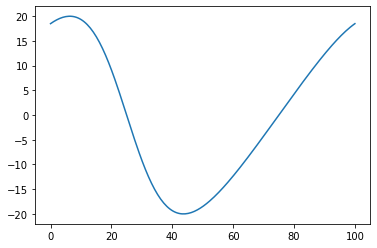

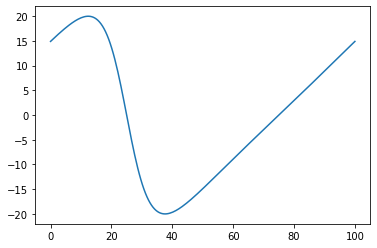

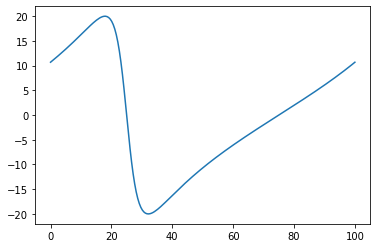

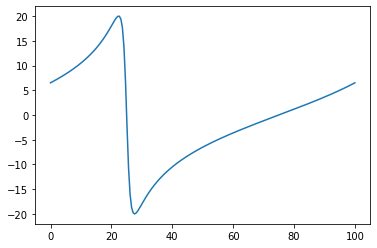

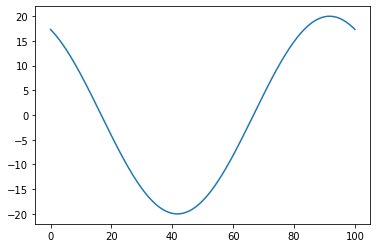

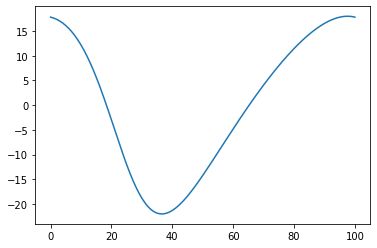

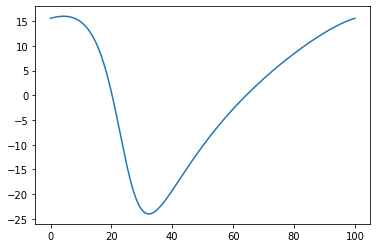

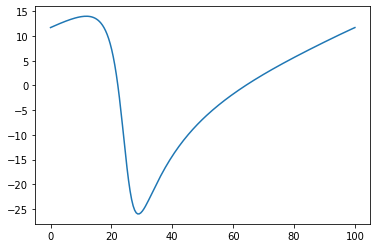

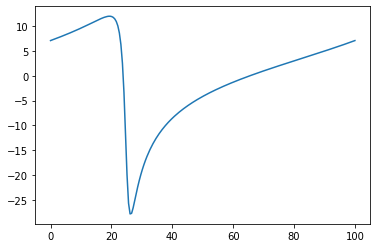

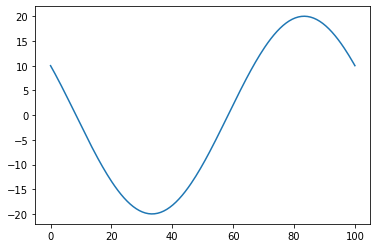

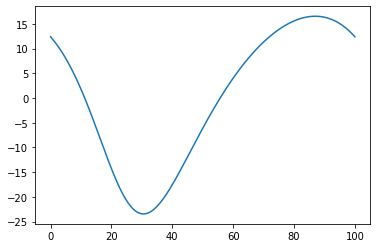

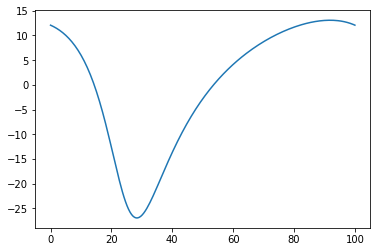

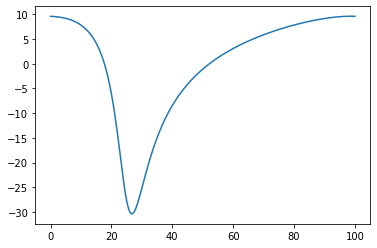

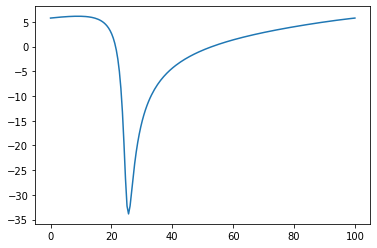

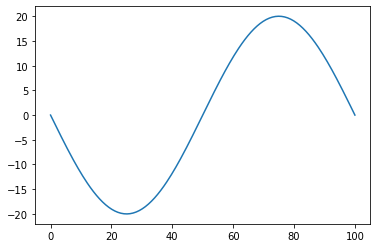

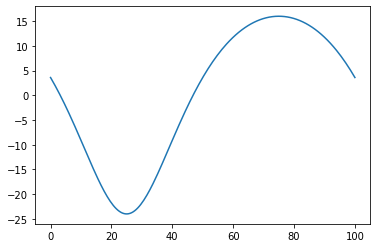

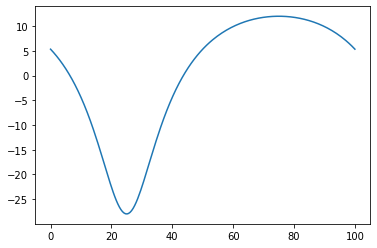

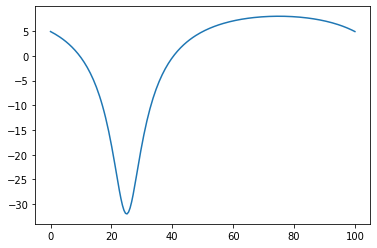

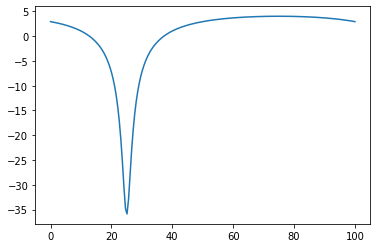

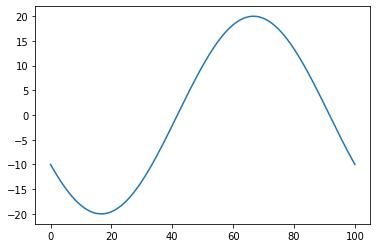

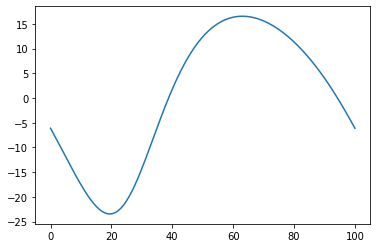

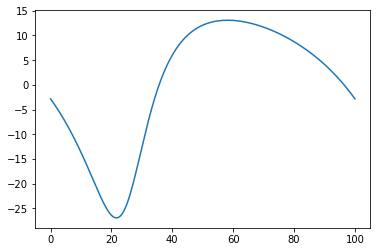

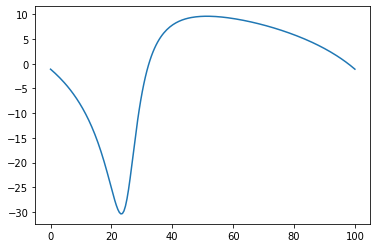

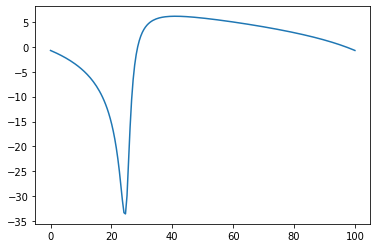

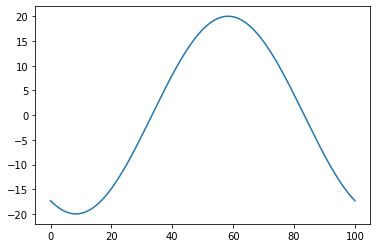

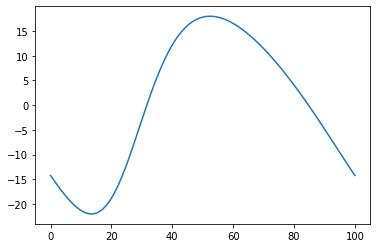

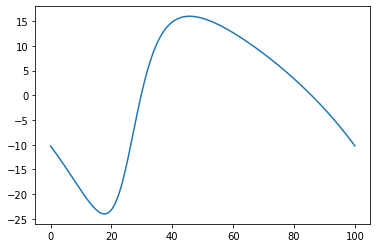

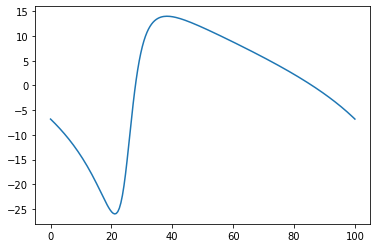

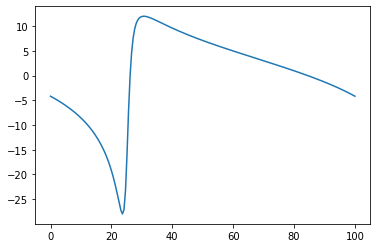

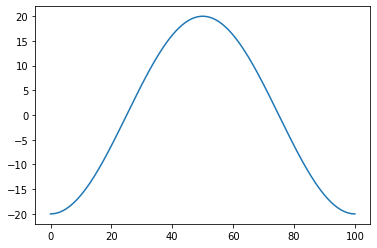

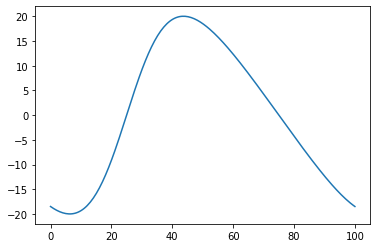

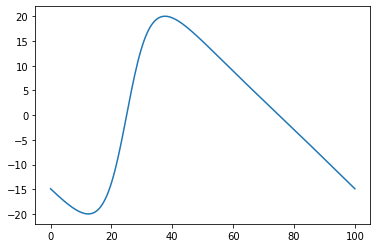

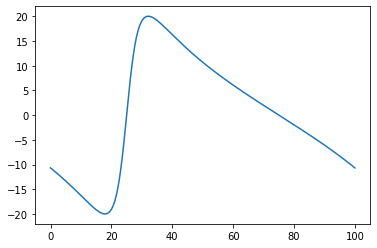

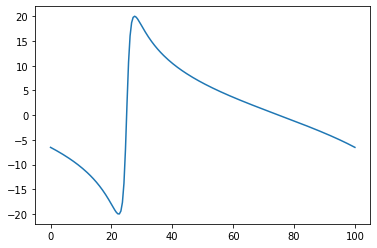

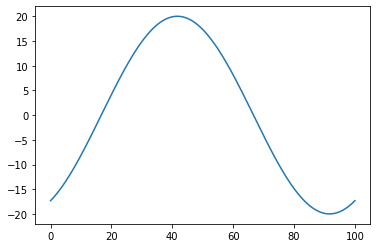

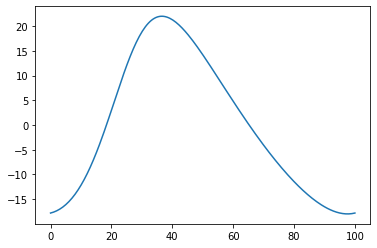

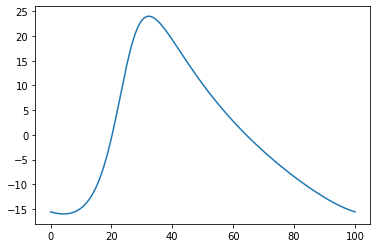

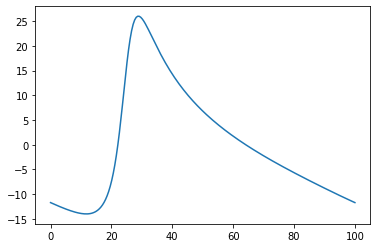

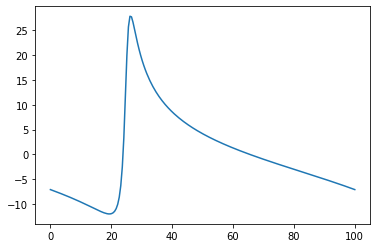

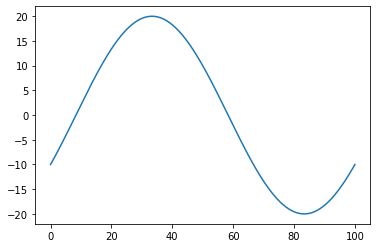

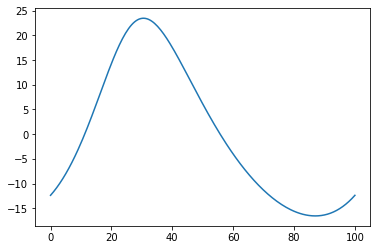

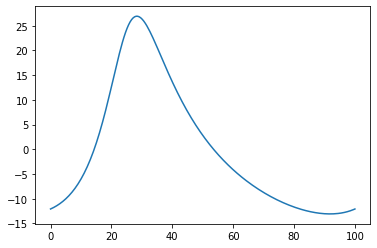

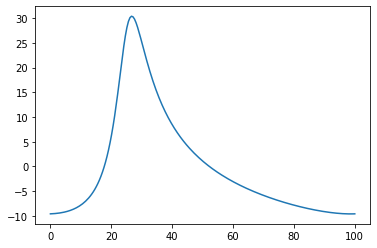

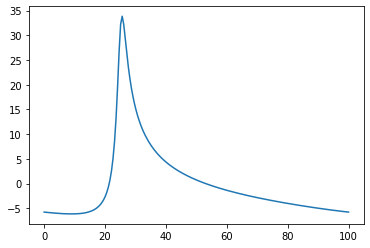

In [70]:
e_steps = np.linspace(0, 1.0, 11)
w_steps = np.linspace(0, 2*np.pi, 13)

orbels = []

# Creates a list of all orbital parameters for each plot, left to right, top to bottom
for i in range(12):
    for j in range(10):
        orbels.append([100, 25, e_steps[j], w_steps[i], 20])

times = np.linspace(0, 100, 200)
rvmods = []

# Creates a list of all RV models for plotting
for i in range(120):
    rvmods.append(radvel.kepler.rv_drive(times, orbels[i]))
    
for i in range(60):
    fig, ax = plt.subplots()
    ax.plot(times, rvmods[i*2])
    fig.savefig('/Users/collin/Desktop/projects/cps/flashcards/Kepler-{}.png'.format(i))